In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *

# 매출액 예측
### 중요 변수 미적용

In [139]:
df = pd.read_csv('original_day.csv')

df.index = df.Date 
df= df.drop(['Date'], axis=1) 
df = df.apply(pd.to_numeric, errors='coerce')

g3=df.drop(['group_3', 'group_2', 'group_4', 'group_5', 'Wind_direction'], axis=1)


g3

,Temperatures,Wind_speed,Precipitation,Humidity,PM10,PM2.5,group_1
Date,,,,,,,
2017-01-01,2.7,1.5,0.0,75.9,76,68,2.357018e+09
2017-01-02,5.0,2.1,0.3,77.8,103,91,2.571541e+09
2017-01-03,2.0,1.8,0.0,61.8,66,55,2.789737e+09
2017-01-04,3.9,1.7,0.0,55.0,49,40,2.918816e+09
2017-01-05,3.8,3.1,0.0,52.3,32,24,3.070856e+09
...,...,...,...,...,...,...,...
2019-12-27,-1.7,2.1,0.0,45.4,33,23,5.342676e+09
2019-12-28,1.1,2.0,0.0,47.6,40,25,4.708611e+09
2019-12-29,3.8,2.9,1.4,52.5,42,27,3.262494e+09


In [140]:
mean=g3.mean(axis=0)
g3-=mean
std=g3.std(axis=0)
g3/=std
g3

,Temperatures,Wind_speed,Precipitation,Humidity,PM10,PM2.5,group_1
Date,,,,,,,
2017-01-01,-0.966099,-0.690963,-0.257011,1.236161,1.249643,2.356866,-1.979909
2017-01-02,-0.754977,0.211547,-0.232242,1.362684,2.278084,3.661287,-1.624044
2017-01-03,-1.030353,-0.239708,-0.257011,0.297232,0.868739,1.619585,-1.262084
2017-01-04,-0.855948,-0.390126,-0.257011,-0.155585,0.221203,0.768875,-1.047957
2017-01-05,-0.865127,1.715730,-0.257011,-0.335380,-0.426334,-0.138548,-0.795743
...,...,...,...,...,...,...,...
2019-12-27,-1.369985,0.211547,-0.257011,-0.794856,-0.388244,-0.195262,2.972918
2019-12-28,-1.112967,0.061129,-0.257011,-0.648357,-0.121611,-0.081834,1.921084
2019-12-29,-0.865127,1.414894,-0.141422,-0.322062,-0.045430,0.031594,-0.477840


In [141]:
'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(g3)
g3.loc[:,:] = scaled_values
g3
'''

'\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nscaled_values = scaler.fit_transform(g3)\ng3.loc[:,:] = scaled_values\ng3\n'

In [142]:
Y = g3['group_1']

y_2017=Y[:365]
y_2018=Y[365:730]
y_2019=Y[-365:]


g3.drop(['group_1'], axis=1, inplace=True)

X_train = np.asarray(g3[:729].values.tolist(), dtype=np.float32)
X_test = np.asarray(g3[729:1094].values.tolist(), dtype=np.float32)



Y_train = Y[1:730]
Y_test = Y[730:1095]
y_test=Y_test



print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(729, 6)
(729,)
(365, 6)
(365,)


In [143]:
X_train=X_train[:729]
Y_train=Y_train[:729]

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(729, 6)
(729,)
(365, 6)
(365,)


In [144]:
features=6
time_step=1


X_train = X_train.reshape(-1, time_step, features)
Y_train = Y_train.values.reshape(-1, time_step, 1)
X_test = X_test.reshape(-1, time_step, features)
Y_test = Y_test.values.reshape(-1, time_step, 1)



In [91]:
#from keras import optimizers
#opt = SGD(lr=0.05, decay=0.05, momentum=0.9, nesterov=True)

model = Sequential()
#model.add(LSTM(32, input_shape=(1,7), activation='relu',return_sequences=False))
#model.add(Dense(1))
model.add(LSTM(128, input_shape=(time_step,features), activation='relu',return_sequences=True))
model.add(LSTM(32, input_shape=(time_step,features), activation='relu',return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32, return_sequences=False))
#model.add(Dense(1))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='lecun_normal', activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 1, 128)            69120     
_________________________________________________________________
lstm_22 (LSTM)               (None, 1, 32)             20608     
_________________________________________________________________
dropout_14 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dropout_15 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 98,081
Trainable params: 98,081
Non-trainable params: 0
__________________________________________________

In [92]:

#from keras.callbacks import EarlyStopping
#early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)


hist = model.fit(X_train, Y_train, epochs=300, batch_size=1, validation_data=(X_train, Y_train), verbose=0)

In [93]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=1)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

365/365 [==============================] - 0s 1ms/step - loss: 0.4343 - mean_squared_error: 0.4343
## evaluation loss and_metrics ##
[0.4343097507953644, 0.4343097507953644]


In [94]:
y_pred = model.predict(X_test)
#print(y_pred.shape)
#print(y_pred)

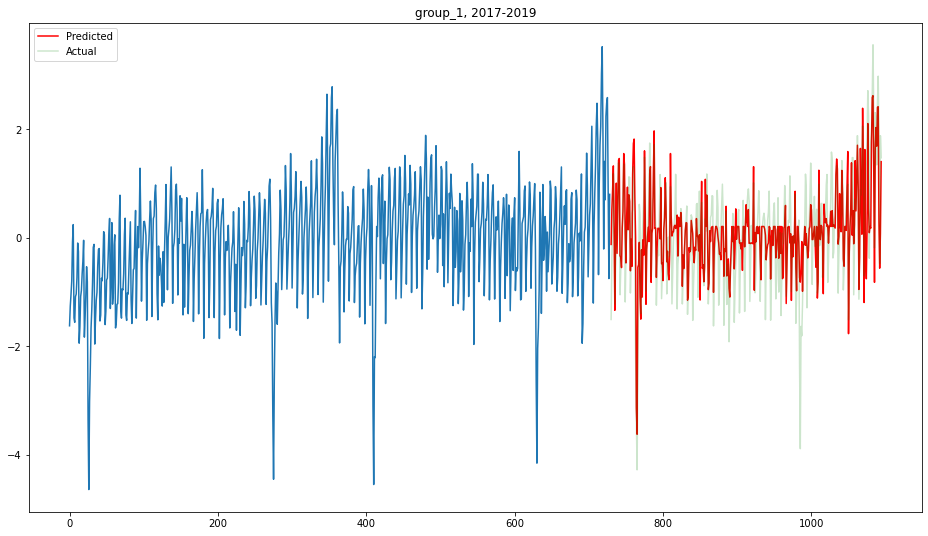

In [95]:
a_axis = np.arange(0, 729)
b_axis = np.arange(730, 1095)

plt.figure(figsize=(16,9))
#plt.plot(a_axis, Y_train[:730].reshape(730,), 'o-')
plt.plot(a_axis, Y_train[:729].reshape(729,))
plt.plot(b_axis, y_pred.reshape(365,), color='red', label='Predicted')
plt.plot(b_axis, Y_test.reshape(365,), color='green', alpha=0.2, label='Actual')
plt.legend()
plt.title("group_1, 2017-2019")
plt.show()


### 중요 변수 적용

In [133]:
df = pd.read_csv('original_day_added.csv')


df.index = df.Date 
df= df.drop(['Date'], axis=1) 
df = df.apply(pd.to_numeric, errors='coerce')
df=df[['최고기온(°C)','최저기온(°C)', '평균 증기압(hPa)', '평균 5cm 지중온도(°C)', '평균 현지기압(hPa)',
                     '최고 해면기압(hPa)', '평균 전운량(1/10)', '평균 상대습도(%)', '평균 20cm 지중온도(°C)',
                     '평균기온(°C)', '평균 해면기압(hPa)', '5.0m 지중온도(°C)', '0.5m 지중온도(°C)',
                     '평균 10cm 지중온도(°C)', '3.0m 지중온도(°C)', '1.5m 지중온도(°C)', '가조시간(hr)',
        'group_1'
      ]]

df

,최고기온(°C),최저기온(°C),평균 증기압(hPa),평균 5cm 지중온도(°C),평균 현지기압(hPa),최고 해면기압(hPa),평균 전운량(1/10),평균 상대습도(%),평균 20cm 지중온도(°C),평균기온(°C),평균 해면기압(hPa),5.0m 지중온도(°C),0.5m 지중온도(°C),평균 10cm 지중온도(°C),3.0m 지중온도(°C),1.5m 지중온도(°C),가조시간(hr),group_1
Date,,,,,,,,,,,,,,,,,,
2017-01-01,6.9,-1.6,5.6,0.5,1017.1,1031.0,7.0,75.9,1.8,2.7,1027.9,17.5,3.8,0.6,15.7,10.2,9.6,21.580663
2017-01-02,9.2,1.8,6.8,3.9,1011.8,1024.9,7.6,77.8,3.0,5.0,1022.5,17.5,3.8,3.0,15.6,10.1,9.6,21.667771
2017-01-03,7.7,-2.3,4.3,2.6,1013.4,1026.0,1.1,61.8,3.5,2.0,1024.2,17.4,4.5,3.0,15.5,9.9,9.7,21.749213
2017-01-04,8.9,1.0,4.3,3.4,1013.2,1025.3,2.6,55.0,3.6,3.9,1024.0,17.4,4.5,3.3,15.4,9.8,9.7,21.794444
2017-01-05,7.3,-0.1,4.2,2.7,1016.6,1028.6,8.4,52.3,3.5,3.8,1027.3,17.4,4.7,2.8,15.4,9.7,9.7,21.845222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,2.6,-4.6,2.4,0.8,1014.1,1027.9,0.0,45.4,3.1,-1.7,1025.1,17.2,5.0,2.0,15.8,10.5,9.6,22.398992
2019-12-28,6.1,-3.6,3.1,0.3,1017.7,1029.4,3.5,47.6,2.5,1.1,1028.5,17.1,4.5,1.4,15.6,10.3,9.6,22.272659
2019-12-29,6.2,1.1,4.2,1.8,1015.0,1029.2,9.0,52.5,2.7,3.8,1025.7,17.2,4.3,2.0,15.6,10.2,9.6,21.905758


In [134]:
mean=df.mean(axis=0)
df-=mean
std=df.std(axis=0)
df/=std
df

,최고기온(°C),최저기온(°C),평균 증기압(hPa),평균 5cm 지중온도(°C),평균 현지기압(hPa),최고 해면기압(hPa),평균 전운량(1/10),평균 상대습도(%),평균 20cm 지중온도(°C),평균기온(°C),평균 해면기압(hPa),5.0m 지중온도(°C),0.5m 지중온도(°C),평균 10cm 지중온도(°C),3.0m 지중온도(°C),1.5m 지중온도(°C),가조시간(hr),group_1
Date,,,,,,,,,,,,,,,,,,
2017-01-01,-1.024818,-0.962184,-0.667623,-1.286198,1.372432,1.425880,0.722440,1.236161,-1.278000,-0.966099,1.364609,0.907830,-1.201932,-1.326699,-0.020982,-0.815801,-1.456179,-2.016854
2017-01-02,-0.816432,-0.653923,-0.521192,-0.970010,0.699646,0.695656,0.914611,1.362684,-1.155585,-0.754977,0.715041,0.907830,-1.201932,-1.095931,-0.047239,-0.831141,-1.456179,-1.569654
2017-01-03,-0.952336,-1.025649,-0.826257,-1.090905,0.902751,0.827336,-1.167241,0.297232,-1.104578,-1.030353,0.919535,0.857461,-1.125047,-1.095931,-0.073497,-0.861823,-1.400243,-1.151542
2017-01-04,-0.843613,-0.726455,-0.826257,-1.016508,0.877363,0.743539,-0.686813,-0.155585,-1.094377,-0.855948,0.895477,0.857461,-1.125047,-1.067085,-0.099754,-0.877163,-1.400243,-0.919332
2017-01-05,-0.988577,-0.826186,-0.838460,-1.081606,1.308961,1.138579,1.170838,-0.335380,-1.104578,-0.865127,1.292435,0.857461,-1.103080,-1.115162,-0.099754,-0.892504,-1.400243,-0.658644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,-1.414409,-1.234179,-1.058107,-1.258299,0.991610,1.054782,-1.519554,-0.794856,-1.145383,-1.369985,1.027796,0.756724,-1.070130,-1.192085,0.005275,-0.769779,-1.456179,2.184338
2019-12-28,-1.097300,-1.143514,-0.972689,-1.304798,1.448596,1.234346,-0.398557,-0.648357,-1.206591,-1.112967,1.436783,0.706356,-1.125047,-1.249777,-0.047239,-0.800460,-1.456179,1.535758
2019-12-29,-1.088240,-0.717388,-0.838460,-1.165303,1.105856,1.210404,1.363009,-0.322062,-1.186189,-0.865127,1.099970,0.756724,-1.147015,-1.192085,-0.047239,-0.815801,-1.456179,-0.347863


In [135]:
Y = df['group_1']

y_2017=Y[:365]
y_2018=Y[365:730]
y_2019=Y[-365:]


df.drop(['group_1'], axis=1, inplace=True)

X_train = np.asarray(df[:729].values.tolist(), dtype=np.float32)
X_test = np.asarray(df[729:1094].values.tolist(), dtype=np.float32)



Y_train = Y[1:730]
Y_test = Y[730:1095]
y_test=Y_test



print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(729, 17)
(729,)
(365, 17)
(365,)


In [136]:
X_train=X_train[:729]
Y_train=Y_train[:729]

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(729, 17)
(729,)
(365, 17)
(365,)


In [137]:
features=17
time_step=1


X_train = X_train.reshape(-1, time_step, features)
Y_train = Y_train.values.reshape(-1, time_step, 1)
X_test = X_test.reshape(-1, time_step, features)
Y_test = Y_test.values.reshape(-1, time_step, 1)


print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(729, 1, 17)
(729, 1, 1)
(365, 1, 17)
(365, 1, 1)


In [127]:
model = Sequential()
model.add(LSTM(128, input_shape=(time_step,features), activation='relu',return_sequences=True))
model.add(LSTM(32, input_shape=(time_step,features), activation='relu',return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='lecun_normal', activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 1, 128)            75776     
_________________________________________________________________
lstm_31 (LSTM)               (None, 1, 32)             20608     
_________________________________________________________________
dropout_20 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dropout_21 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 104,737
Trainable params: 104,737
Non-trainable params: 0
_______________________________________________

In [128]:
hist = model.fit(X_train, Y_train, epochs=300, batch_size=1, validation_data=(X_train, Y_train), verbose=0)

In [129]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=1)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

365/365 [==============================] - 0s 1ms/step - loss: 0.1143 - mean_squared_error: 0.1143
## evaluation loss and_metrics ##
[0.11431606858968735, 0.11431606858968735]


In [130]:
y_pred = model.predict(X_test)
#print(y_pred.shape)
#print(y_pred)

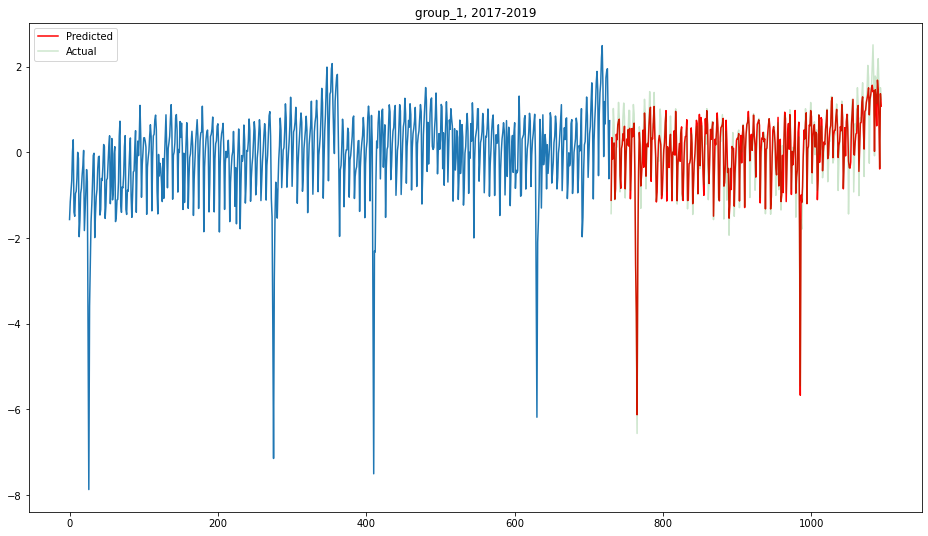

In [131]:
a_axis = np.arange(0, 729)
b_axis = np.arange(730, 1095)

plt.figure(figsize=(16,9))
plt.plot(a_axis, Y_train[:729].reshape(729,))
plt.plot(b_axis, y_pred.reshape(365,), color='red', label='Predicted')
plt.plot(b_axis, Y_test.reshape(365,), color='green', alpha=0.2, label='Actual')
plt.legend()
plt.title("group_1, 2017-2019")
plt.show()

# 전날 대비 매출 상승률 예측
### 중요 변수 적용

In [117]:
df = pd.read_csv('original_day_edited.csv')


df.index = df.Date 
df= df.drop(['Date'], axis=1) 
df = df.apply(pd.to_numeric, errors='coerce')
df=df[['최고기온(°C)','최저기온(°C)', '평균 증기압(hPa)', '평균 5cm 지중온도(°C)', '평균 현지기압(hPa)',
                     '최고 해면기압(hPa)', '평균 전운량(1/10)', '평균 상대습도(%)', '평균 20cm 지중온도(°C)',
                     '평균기온(°C)', '평균 해면기압(hPa)', '5.0m 지중온도(°C)', '0.5m 지중온도(°C)',
                     '평균 10cm 지중온도(°C)', '3.0m 지중온도(°C)', '1.5m 지중온도(°C)', '가조시간(hr)',
       'group_1'
      ]]

df

,최고기온(°C),최저기온(°C),평균 증기압(hPa),평균 5cm 지중온도(°C),평균 현지기압(hPa),최고 해면기압(hPa),평균 전운량(1/10),평균 상대습도(%),평균 20cm 지중온도(°C),평균기온(°C),평균 해면기압(hPa),5.0m 지중온도(°C),0.5m 지중온도(°C),평균 10cm 지중온도(°C),3.0m 지중온도(°C),1.5m 지중온도(°C),가조시간(hr),group_1
Date,,,,,,,,,,,,,,,,,,
2017-01-01,6.9,-1.6,5.6,0.5,1017.1,1031.0,7.0,75.9,1.8,2.7,1027.9,17.5,3.8,0.6,15.7,10.2,9.6,0.000000
2017-01-02,9.2,1.8,6.8,3.9,1011.8,1024.9,7.6,77.8,3.0,5.0,1022.5,17.5,3.8,3.0,15.6,10.1,9.6,0.403639
2017-01-03,7.7,-2.3,4.3,2.6,1013.4,1026.0,1.1,61.8,3.5,2.0,1024.2,17.4,4.5,3.0,15.5,9.9,9.7,0.375867
2017-01-04,8.9,1.0,4.3,3.4,1013.2,1025.3,2.6,55.0,3.6,3.9,1024.0,17.4,4.5,3.3,15.4,9.8,9.7,0.207966
2017-01-05,7.3,-0.1,4.2,2.7,1016.6,1028.6,8.4,52.3,3.5,3.8,1027.3,17.4,4.7,2.8,15.4,9.7,9.7,0.232986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,2.6,-4.6,2.4,0.8,1014.1,1027.9,0.0,45.4,3.1,-1.7,1025.1,17.2,5.0,2.0,15.8,10.5,9.6,0.251887
2019-12-28,6.1,-3.6,3.1,0.3,1017.7,1029.4,3.5,47.6,2.5,1.1,1028.5,17.1,4.5,1.4,15.6,10.3,9.6,-0.564015
2019-12-29,6.2,1.1,4.2,1.8,1015.0,1029.2,9.0,52.5,2.7,3.8,1025.7,17.2,4.3,2.0,15.6,10.2,9.6,-1.647316


In [118]:
mean=df.mean(axis=0)
df-=mean
std=df.std(axis=0)
df/=std

In [119]:
Y = df['group_1']

y_2017=Y[:365]
y_2018=Y[365:730]
y_2019=Y[-365:]


df.drop(['group_1'], axis=1, inplace=True)

X_train = np.asarray(df[:729].values.tolist(), dtype=np.float32)
X_test = np.asarray(df[729:1094].values.tolist(), dtype=np.float32)

Y_train = Y[1:730]
Y_test = Y[730:1095]
y_test=Y_test


In [120]:
X_train=X_train[:729]
Y_train=Y_train[:729]


In [121]:
features=17
time_step=1


X_train = X_train.reshape(-1, time_step, features)
Y_train = Y_train.values.reshape(-1, time_step, 1)
X_test = X_test.reshape(-1, time_step, features)
Y_test = Y_test.values.reshape(-1, time_step, 1)


print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(729, 1, 17)
(729, 1, 1)
(365, 1, 17)
(365, 1, 1)


In [112]:
model = Sequential()
model.add(LSTM(128, input_shape=(time_step,features), activation='relu',return_sequences=True))
model.add(LSTM(32, input_shape=(time_step,features), activation='relu',return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='lecun_normal', activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 1, 128)            75776     
_________________________________________________________________
lstm_28 (LSTM)               (None, 1, 32)             20608     
_________________________________________________________________
dropout_18 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dropout_19 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 104,737
Trainable params: 104,737
Non-trainable params: 0
________________________________________________

In [113]:
hist = model.fit(X_train, Y_train, epochs=400, batch_size=1, validation_data=(X_train, Y_train), verbose=0)

In [114]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=1)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

365/365 [==============================] - 0s 1ms/step - loss: 0.1699 - mean_squared_error: 0.1699
## evaluation loss and_metrics ##
[0.16989152133464813, 0.16989152133464813]


In [115]:
y_pred = model.predict(X_test)
#print(y_pred.shape)
#print(y_pred)

Text(0, 0.5, 'take')

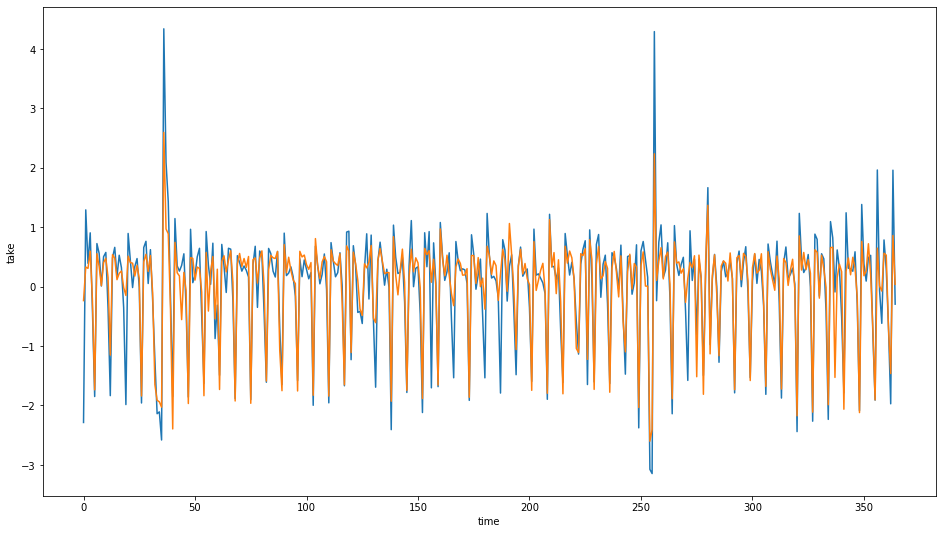

In [116]:
plt.figure(figsize=(16,9))
#plt.plot(all[220:365].reshape(145,1))

plt.plot(Y_test.reshape(365,1), label = 'actual')
plt.plot(y_pred.reshape(365,1), label='predict')
plt.xlabel('time')
plt.ylabel('take')